In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from main3 import TemporalAnalyzer
import seaborn as sns

In [1]:

# experiment1_5km/results_5km/results_dpg_0.5_full_day.npz
df = np.load('/home/go3/wch_code/jx/real_data/experiment1_5km/results_5km_1h_0623/results_dpg_3.0_full_day.npz', allow_pickle=True)


NameError: name 'np' is not defined

In [ ]:
df['results']

array({'tw_08:00:00_08:59:59': [<estimation3.EstimationResult object at 0x7f168b088820>], 'tw_09:00:00_09:59:59': [<estimation3.EstimationResult object at 0x7f168b0cb880>], 'tw_10:00:00_10:59:59': [<estimation3.EstimationResult object at 0x7f168b07b490>], 'tw_11:00:00_11:59:59': [<estimation3.EstimationResult object at 0x7f168b091850>], 'tw_12:00:00_12:59:59': [<estimation3.EstimationResult object at 0x7f168b057070>], 'tw_13:00:00_13:59:59': [<estimation3.EstimationResult object at 0x7f168ae54a90>], 'tw_14:00:00_14:59:59': [<estimation3.EstimationResult object at 0x7f168af95190>], 'tw_15:00:00_15:59:59': [<estimation3.EstimationResult object at 0x7f168afb7e20>], 'tw_16:00:00_16:59:59': [<estimation3.EstimationResult object at 0x7f168b018d30>], 'tw_17:00:00_17:59:59': [<estimation3.EstimationResult object at 0x7f168b026760>], 'tw_18:00:00_18:59:59': [<estimation3.EstimationResult object at 0x7f168aeb9eb0>], 'tw_19:00:00_19:59:59': [<estimation3.EstimationResult object at 0x7f168af0b8e0>

In [ ]:
# get values for df['results']
results = df['results'].item()

In [35]:
results
# get the values of the content of the first key
keys = list(results.keys())
values = list(results.values())

In [37]:
values[0]

In [33]:
results.keys()

dict_keys(['tw_08:00:00_08:59:59', 'tw_09:00:00_09:59:59', 'tw_10:00:00_10:59:59', 'tw_11:00:00_11:59:59', 'tw_12:00:00_12:59:59', 'tw_13:00:00_13:59:59', 'tw_14:00:00_14:59:59', 'tw_15:00:00_15:59:59', 'tw_16:00:00_16:59:59', 'tw_17:00:00_17:59:59', 'tw_18:00:00_18:59:59', 'tw_19:00:00_19:59:59', 'tw_20:00:00_20:59:59', 'tw_21:00:00_21:59:59', 'tw_22:00:00_22:59:59', 'tw_23:00:00_23:59:59'])

In [28]:
results['tw_08:00:00_08:59:59'][0].time_window

'08:00:00-08:59:59'

In [ ]:
dd = dict(df['results'])


TypeError: iteration over a 0-d array

In [13]:
dd

NameError: name 'dd' is not defined

In [10]:
df['results'].keys()

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [2]:
def visualize_results(results, save_dir):
    ''''
    results: List of EstimationResult objects
    save_dir: Directory to save the plots
    '''

    num_total_cells = len(results[0].omega)
    windows = [result.time_window for result in results]
    alphas = [result.beta[0] for result in results]

    plt.figure(figsize=(10, 5))
    plt.plot(windows, alphas, marker='o')
    plt.title('Alpha Across Time Windows')
    plt.xlabel('Time Window')
    plt.ylabel('Alpha')
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(save_dir, 'alpha.png'))
    plt.close()

    v_dict = {r.time_window: r.beta[1:1+num_total_cells] for r in results}
    v_df = pd.DataFrame(v_dict)
    v_df.index.name = 'Location Index'
    plt.figure(figsize=(15, 8))
    for time_window in v_df.columns:
        plt.plot(v_df.index, v_df[time_window], marker='o', label=time_window)
    plt.title('v Distribution Across Location Indices')
    plt.xlabel('Location Index')
    plt.ylabel('v Value')
    plt.legend(title='Time Window', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, 'v_distribution.png'))
    plt.close()

    v0_dict = {r.time_window: r.beta[1+num_total_cells:] for r in results}
    v0_df = pd.DataFrame(v0_dict)
    v0_df.index.name = 'Location Index'
    plt.figure(figsize=(15, 8))
    for time_window in v0_df.columns:
        plt.plot(v0_df.index, v0_df[time_window], marker='o', label=time_window)
    plt.title('v0 Distribution Across Location Indices')
    plt.xlabel('Location Index')
    plt.ylabel('v0 Value')
    plt.legend(title='Time Window', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, 'v0_distribution.png'))
    plt.close()

    v_means = [np.mean(result.beta[1:1+num_total_cells]) for result in results]
    v_stds = [np.std(result.beta[1:1+num_total_cells]) for result in results]
    plt.figure(figsize=(10, 5))
    plt.errorbar(windows, v_means, yerr=v_stds, marker='o', capsize=5)
    plt.title('Mean and Std of v Across Time Windows')
    plt.xlabel('Time Window')
    plt.ylabel('v (mean ± std)')
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(save_dir, 'v_summary.png'))
    plt.close()

    v0_means = [np.mean(result.beta[1+num_total_cells:]) for result in results]
    v0_stds = [np.std(result.beta[1+num_total_cells:]) for result in results]
    plt.figure(figsize=(10, 5))
    plt.errorbar(windows, v0_means, yerr=v0_stds, marker='o', capsize=5)
    plt.title('Mean and Std of v0 Across Time Windows')
    plt.xlabel('Time Window')
    plt.ylabel('v0 (mean ± std)')
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(save_dir, 'v0_summary.png'))
    plt.close()

    plt.figure(figsize=(12, 6))
    lambdas = [r.lambda_hat for r in results]
    sns.barplot(x=windows, y=lambdas)
    plt.title('Lambda Values Across Time Windows')
    plt.ylabel('Lambda')
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(save_dir, 'lambda_comparison.png'))
    plt.close()

    plt.figure(figsize=(12, 6))
    for train_date in set().union(*[r.in_sample_wmapes.keys() for r in results]):
        in_sample_wmapes = [r.in_sample_wmapes.get(train_date, np.nan) for r in results]
        sns.lineplot(x=windows, y=in_sample_wmapes, marker='o', label=f'In-sample WMAPE ({train_date})')
    plt.title('In-sample WMAPE Across Time Windows')
    plt.ylabel('WMAPE (%)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'in_sample_wmape.png'))
    plt.close()

    plt.figure(figsize=(12, 6))
    for test_date in set().union(*[r.out_sample_wmapes.keys() for r in results]):
        out_sample_wmapes = [r.out_sample_wmapes.get(test_date, np.nan) for r in results]
        sns.lineplot(x=windows, y=out_sample_wmapes, marker='o', label=f'Out-sample WMAPE ({test_date})')
    plt.title('Out-of-sample WMAPE Across Time Windows')
    plt.ylabel('WMAPE (%)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'out_sample_wmape.png'))
    plt.close()

    omega_dict = {r.time_window: r.omega for r in results}
    omega_df = pd.DataFrame(omega_dict)
    omega_df.index.name = 'Location Index'
    plt.figure(figsize=(15, 8))
    for time_window in omega_df.columns:
        plt.plot(omega_df.index, omega_df[time_window], marker='o', label=time_window)
    plt.title('Omega Distribution Across Location Indices')
    plt.xlabel('Location Index')
    plt.ylabel('Omega Value')
    plt.legend(title='Time Window', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, 'omega_distribution.png'))
    plt.close()

    # Box plot for relative errors
    font_size = 15
# Prepare data for in-sample relative errors, filtering above 95th quantile
    in_relative_errors_dict = {}
    in_medians = {}
    for r in results:
        errors = np.array(r.in_relative_errors)
        if len(errors) > 0:  # Ensure there are values to compute quantile
            quantile_95 = np.quantile(errors, 0.95)
            filtered_errors = errors[errors <= quantile_95]
            in_relative_errors_dict[r.time_window] = filtered_errors
            in_medians[r.time_window] = np.median(filtered_errors) if len(filtered_errors) > 0 else np.nan
        else:
            in_relative_errors_dict[r.time_window] = []
            in_medians[r.time_window] = np.nan
    
    in_relative_errors_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in in_relative_errors_dict.items()]))
    
    # Create boxplot for in-sample relative errors
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=in_relative_errors_df)
    
    # Add median markers
    for idx, time_window in enumerate(in_relative_errors_df.columns):
        median_val = in_medians[time_window]
        if not np.isnan(median_val):
            plt.plot(idx, median_val, 'rD', markersize=8, label='Median' if idx == 0 else '')
    
    plt.title('In-sample Relative Errors Across Time Windows (Below 95th Quantile)', fontsize=font_size)
    plt.ylabel('Error (%)', fontsize=font_size)
    plt.xlabel('Time Window', fontsize=font_size)
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'in_relative_errors.png'))
    plt.show()
    
    # Prepare data for out-of-sample relative errors, filtering above 95th quantile
    out_relative_errors_dict = {}
    out_medians = {}
    for r in results:
        errors = np.array(r.out_relative_errors)
        if len(errors) > 0:  # Ensure there are values to compute quantile
            quantile_95 = np.quantile(errors, 0.95)
            filtered_errors = errors[errors <= quantile_95]
            out_relative_errors_dict[r.time_window] = filtered_errors
            out_medians[r.time_window] = np.median(filtered_errors) if len(filtered_errors) > 0 else np.nan
        else:
            out_relative_errors_dict[r.time_window] = []
            out_medians[r.time_window] = np.nan
    
    out_relative_errors_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in out_relative_errors_dict.items()]))
    
    # Create boxplot for out-of-sample relative errors
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=out_relative_errors_df)
    
    # Add median markers
    for idx, time_window in enumerate(out_relative_errors_df.columns):
        median_val = out_medians[time_window]
        if not np.isnan(median_val):
            plt.plot(idx, median_val, 'rD', markersize=8, label='Median' if idx == 0 else '')
    
    plt.title('Out-of-sample Relative Errors Across Time Windows (Below 95th Quantile)', fontsize=font_size)
    plt.ylabel('Error (%)', fontsize=font_size)
    plt.xlabel('Time Window', fontsize=font_size)
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'out_relative_errors.png'))
    plt.show()

In [ ]:
save_dir = 'results_5km/'
dist_per_grid_list = [
    # 0.5
    # , 
    1.0, 1.5, 2.0, 2.5, 
    3.0
    , 4.0,5.0
    ]  # List of distance per grid values

# Task 1: Fix grid size and time period, look at the WMAPE

# Define different time_windows configurations with identifiers
time_windows_configs = [
    ('full_day', [
        # ('00:00', '01:59:59'), 
        # ('02:00', '03:59:59'), 
        # ('04:00', '05:59:59'),
        ('08:00', '09:59:59'), 
        ('10:00', '11:59:59'), 
        ('12:00', '13:59:59'),
        ('14:00', '15:59:59'), 
        ('16:00', '17:59:59'), 
        ('18:00', '19:59:59'),
        ('20:00', '21:59:59'), 
        ('22:00', '23:59:59')
    ])]

experiments = [
    (dpg, tw, tw_id)
    for tw_id, tw in time_windows_configs
    for dpg in dist_per_grid_list
]
for d in dist_per_grid_list:
    exp1 = np.load(f'/home/go3/wch_code/jx/real_data/experiment1_5km/results_5km/results_dpg_{d}_full_day.npz', allow_pickle=True)
    # results = np.load(f'{save_dir}results_dpg_{dist_per_grid}_{tw_id}.npz', allow_pickle=True)
    # results = dict(results)['results']
    save_dir = f'plots_5km_2/dpg_{d}_tw_full_day'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    visualize_results(exp1['results'], save_dir)
    # visualize_results(results['results'], save_dir)



In [ ]:
exp1['results'][0].in_relative_errors
print(f"Number of in-sample relative errors: {len(exp1['results'][0].in_relative_errors)}")
# filter out the nan and inf values
in_relative_errors = [x for x in exp1['results'][0].in_relative_errors if not np.isnan(x) and not np.isinf(x)]
# why nan: no ruch order record
# why inf: actual order is 0
print(len(in_relative_errors))

123


In [8]:
len(in_relative_errors)

123

In [93]:
i.in_relative_errors

[8795528.184306623,
 2857422.9824172556,
 1031935.6222264572,
 358860.2666168027,
 119379.73978894281,
 38830.11075541328,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2883956.214898169,
 1568914.767434968,
 650791.650126041,
 233353.27567742908,
 71478.92143780348,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1069124.6762390824,
 673162.6158707495,
 337237.9292210367,
 135292.95892136492,
 568099.6034339463,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 402371.6893621256,
 261498.7088654666,
 145926.14611975008,
 63580.406079806504,
 28969.423588990016,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 146723.48041872284,
 93332.72015482288,
 54499.73077573122,
 27640.8492844636,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 53770.085383925194,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [92]:
for i in exp1['results']: print(i)

In [87]:
for i in results: print(i)

results


In [77]:
(results.all())

In [71]:
dict(results)['results']

array([<estimation3.EstimationResult object at 0x7fc709b80820>,
      dtype=object)

In [72]:
results['results']

array([<estimation3.EstimationResult object at 0x7fc6ec89c070>,
      dtype=object)

In [61]:
(results.all())[0]

TypeError: 'EstimationResult' object is not subscriptable

In [ ]:
results

In [53]:
results.omega

array([0.00173582, 0.00173196, 0.00172558, 0.00171923, 0.00171086,
       0.00170192, 0.00242639, 0.0016894 , 0.00216406, 0.00170257,
       0.00171956, 0.00172642, 0.00173122, 0.00173307, 0.00173413,
       0.00173668, 0.00173287, 0.00172924, 0.00171658, 0.00169784,
       0.00235661, 0.00243922, 0.00231633, 0.00343741, 0.00305443,
       0.00296695, 0.00169785, 0.00171494, 0.00172441, 0.00172818,
       0.001731  , 0.00173438, 0.00173094, 0.00172385, 0.00170166,
       0.00166903, 0.00258378, 0.00426656, 0.00331671, 0.00181508,
       0.00293211, 0.00275911, 0.00188677, 0.00180392, 0.00167957,
       0.00171642, 0.00172613, 0.00173139, 0.00173188, 0.0017143 ,
       0.00169003, 0.0024091 , 0.00179217, 0.00178522, 0.00189826,
       0.00333383, 0.00300717, 0.00209549, 0.0023631 , 0.0016895 ,
       0.00182188, 0.00166407, 0.00170069, 0.00172705, 0.00173447,
       0.00189606, 0.00167147, 0.00174912, 0.00268871, 0.00238972,
       0.00429446, 0.00541685, 0.00345947, 0.00625705, 0.00410

In [47]:
results[0]

KeyError: '0 is not a file in the archive'

In [ ]:
# fix: ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all(
results = np.load(f'{save_dir}results_dpg_{dist_per_grid}_{tw_id}.npz', allow_pickle=True)
results = results['results']
save_dir = f'plots_5km_2/dpg_{dist_per_grid}_tw_{tw_id}'
os.makedirs(save_dir, exist_ok=True)
TemporalAnalyzer.visualize_results(results, save_dir)

In [37]:
len(results[0].omega)

272

In [ ]:
# 

In [38]:
results[0].omega

array([0.00170236, 0.00169627, 0.00169123, 0.00168742, 0.00168399,
       0.00168269, 0.00256917, 0.00167943, 0.00167801, 0.00211774,
       0.00193745, 0.00169653, 0.00213266, 0.00169735, 0.00169812,
       0.00170325, 0.00169638, 0.00169022, 0.00167986, 0.00166274,
       0.00249174, 0.0021257 , 0.00360468, 0.00510817, 0.00439594,
       0.00315262, 0.00166372, 0.00192264, 0.00168689, 0.00169061,
       0.00169295, 0.0016981 , 0.00169346, 0.00168467, 0.00202173,
       0.00163577, 0.00371838, 0.00679526, 0.00299474, 0.00182445,
       0.0031934 , 0.00367647, 0.00156034, 0.00262748, 0.00164816,
       0.00167845, 0.00168987, 0.00169616, 0.00169359, 0.00168112,
       0.0018985 , 0.00178552, 0.0017067 , 0.00198875, 0.00287509,
       0.00297955, 0.00318469, 0.00268794, 0.00184009, 0.00164321,
       0.00200491, 0.00163193, 0.0016676 , 0.00169585, 0.00169518,
       0.0016764 , 0.00163884, 0.0015677 , 0.0022646 , 0.0023057 ,
       0.00445729, 0.00616038, 0.00334577, 0.00554292, 0.00389

In [32]:
num_total_cells = len(results[0].omega)
windows = [result.time_window for result in results]
alphas = [result.beta[0] for result in results]


KeyError: 0

In [ ]:
dict(results)

{'results': array([<estimation3.EstimationResult object at 0x7fc6ca5f9b50>,
       dtype=object)}

In [21]:
results['results']

array([<estimation3.EstimationResult object at 0x7fc6d940a7f0>,
      dtype=object)

In [ ]:
# transform this into form of dict


KeyError: 'keys is not a file in the archive'

In [16]:
r = results['results']
if not r: print("No results to visualize.")
        # if not results:
        #     print("No results to visualize.")
        #     return

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [2]:
def visualize_results(results, save_dir):
        ''''
        results: List of EstimationResult objects
        save_dir: Directory to save the plots
        '''

        num_total_cells = len(results[0].omega)
        windows = [result.time_window for result in results]
        alphas = [result.beta[0] for result in results]

        plt.figure(figsize=(10, 5))
        plt.plot(windows, alphas, marker='o')
        plt.title('Alpha Across Time Windows')
        plt.xlabel('Time Window')
        plt.ylabel('Alpha')
        plt.xticks(rotation=45)
        plt.savefig(os.path.join(save_dir, 'alpha.png'))
        plt.close()

        v_dict = {r.time_window: r.beta[1:1+num_total_cells] for r in results}
        v_df = pd.DataFrame(v_dict)
        v_df.index.name = 'Location Index'
        plt.figure(figsize=(15, 8))
        for time_window in v_df.columns:
            plt.plot(v_df.index, v_df[time_window], marker='o', label=time_window)
        plt.title('v Distribution Across Location Indices')
        plt.xlabel('Location Index')
        plt.ylabel('v Value')
        plt.legend(title='Time Window', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, 'v_distribution.png'))
        plt.close()

        v0_dict = {r.time_window: r.beta[1+num_total_cells:] for r in results}
        v0_df = pd.DataFrame(v0_dict)
        v0_df.index.name = 'Location Index'
        plt.figure(figsize=(15, 8))
        for time_window in v0_df.columns:
            plt.plot(v0_df.index, v0_df[time_window], marker='o', label=time_window)
        plt.title('v0 Distribution Across Location Indices')
        plt.xlabel('Location Index')
        plt.ylabel('v0 Value')
        plt.legend(title='Time Window', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, 'v0_distribution.png'))
        plt.close()

        v_means = [np.mean(result.beta[1:1+num_total_cells]) for result in results]
        v_stds = [np.std(result.beta[1:1+num_total_cells]) for result in results]
        plt.figure(figsize=(10, 5))
        plt.errorbar(windows, v_means, yerr=v_stds, marker='o', capsize=5)
        plt.title('Mean and Std of v Across Time Windows')
        plt.xlabel('Time Window')
        plt.ylabel('v (mean ± std)')
        plt.xticks(rotation=45)
        plt.savefig(os.path.join(save_dir, 'v_summary.png'))
        plt.close()

        v0_means = [np.mean(result.beta[1+num_total_cells:]) for result in results]
        v0_stds = [np.std(result.beta[1+num_total_cells:]) for result in results]
        plt.figure(figsize=(10, 5))
        plt.errorbar(windows, v0_means, yerr=v0_stds, marker='o', capsize=5)
        plt.title('Mean and Std of v0 Across Time Windows')
        plt.xlabel('Time Window')
        plt.ylabel('v0 (mean ± std)')
        plt.xticks(rotation=45)
        plt.savefig(os.path.join(save_dir, 'v0_summary.png'))
        plt.close()

        plt.figure(figsize=(12, 6))
        lambdas = [r.lambda_hat for r in results]
        sns.barplot(x=windows, y=lambdas)
        plt.title('Lambda Values Across Time Windows')
        plt.ylabel('Lambda')
        plt.xticks(rotation=45)
        plt.savefig(os.path.join(save_dir, 'lambda_comparison.png'))
        plt.close()

        plt.figure(figsize=(12, 6))
        for train_date in set().union(*[r.in_sample_wmapes.keys() for r in results]):
            in_sample_wmapes = [r.in_sample_wmapes.get(train_date, np.nan) for r in results]
            sns.lineplot(x=windows, y=in_sample_wmapes, marker='o', label=f'In-sample WMAPE ({train_date})')
        plt.title('In-sample WMAPE Across Time Windows')
        plt.ylabel('WMAPE (%)')
        plt.xticks(rotation=45)
        plt.legend()
        plt.savefig(os.path.join(save_dir, 'in_sample_wmape.png'))
        plt.close()

        plt.figure(figsize=(12, 6))
        for test_date in set().union(*[r.out_sample_wmapes.keys() for r in results]):
            out_sample_wmapes = [r.out_sample_wmapes.get(test_date, np.nan) for r in results]
            sns.lineplot(x=windows, y=out_sample_wmapes, marker='o', label=f'Out-sample WMAPE ({test_date})')
        plt.title('Out-of-sample WMAPE Across Time Windows')
        plt.ylabel('WMAPE (%)')
        plt.xticks(rotation=45)
        plt.legend()
        plt.savefig(os.path.join(save_dir, 'out_sample_wmape.png'))
        plt.close()

        omega_dict = {r.time_window: r.omega for r in results}
        omega_df = pd.DataFrame(omega_dict)
        omega_df.index.name = 'Location Index'
        plt.figure(figsize=(15, 8))
        for time_window in omega_df.columns:
            plt.plot(omega_df.index, omega_df[time_window], marker='o', label=time_window)
        plt.title('Omega Distribution Across Location Indices')
        plt.xlabel('Location Index')
        plt.ylabel('Omega Value')
        plt.legend(title='Time Window', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, 'omega_distribution.png'))
        plt.close()

        # Box plot for relative errors
        font_size = 15
    # Prepare data for in-sample relative errors, filtering above 95th quantile
        in_relative_errors_dict = {}
        # in_medians = {}
        in_mean = {}
        for r in results:
            # errors = np.array(r.in_relative_errors)
            errors = np.concatenate(r.in_relative_errors)
            if len(errors) > 0:  # Ensure there are values to compute quantile
                quantile_95 = np.quantile(errors, 0.95)
                filtered_errors = errors[errors <= quantile_95]
                in_relative_errors_dict[r.time_window] = filtered_errors
                # in_medians[r.time_window] = np.median(filtered_errors) if len(filtered_errors) > 0 else np.nan
                in_mean[r.time_window] = np.mean(filtered_errors)
            else:
                in_relative_errors_dict[r.time_window] = []
                # in_medians[r.time_window] = np.nan
                in_mean[r.time_window] = np.nan
        
        in_relative_errors_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in in_relative_errors_dict.items()]))
        
        # Create boxplot for in-sample relative errors
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=in_relative_errors_df)
        
        # Add median markers
        for idx, time_window in enumerate(in_relative_errors_df.columns):
            # median_val = in_medians[time_window]
            # mean_val = np.mean(in_relative_errors_df[time_window])
            mean_val = in_mean[time_window]
            if not np.isnan(mean_val):
                plt.plot(idx, mean_val, 'rD', markersize=8, label='Mean' if idx == 0 else '')
        
        plt.title('In-sample Relative Errors Across Time Windows (Below 95th Quantile)', fontsize=font_size)
        plt.ylabel('Error (%)', fontsize=font_size)
        plt.xlabel('Time Window', fontsize=font_size)
        plt.xticks(rotation=45)
        plt.legend()
        plt.savefig(os.path.join(save_dir, 'in_relative_errors.png'))
        plt.show()
        
        # Prepare data for out-of-sample relative errors, filtering above 95th quantile
        out_relative_errors_dict = {}
        # out_medians = {}
        out_mean = {}
        for r in results:
            # errors = np.array(r.out_relative_errors)
            errors = np.concatenate(r.out_relative_errors)
            if len(errors) > 0:  # Ensure there are values to compute quantile
                quantile_95 = np.quantile(errors, 0.95)
                filtered_errors = errors[errors <= quantile_95]
                out_relative_errors_dict[r.time_window] = filtered_errors
                # out_medians[r.time_window] = np.median(filtered_errors) if len(filtered_errors) > 0 else np.nan
                out_mean[r.time_window] = np.mean(filtered_errors)
            else:
                out_relative_errors_dict[r.time_window] = []
                # out_medians[r.time_window] = np.nan
                out_mean[r.time_window] = np.nan
        
        out_relative_errors_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in out_relative_errors_dict.items()]))
        
        # Create boxplot for out-of-sample relative errors
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=out_relative_errors_df)
        
        # Add median markers
        for idx, time_window in enumerate(out_relative_errors_df.columns):
            # median_val = out_medians[time_window]
            mean_val = out_mean[time_window]
            if not np.isnan(mean_val):
                plt.plot(idx, mean_val, 'rD', markersize=8, label='Mean' if idx == 0 else '')
        
        plt.title('Out-of-sample Relative Errors Across Time Windows (Below 95th Quantile)', fontsize=font_size)
        plt.ylabel('Error (%)', fontsize=font_size)
        plt.xlabel('Time Window', fontsize=font_size)
        plt.xticks(rotation=45)
        plt.legend()
        plt.savefig(os.path.join(save_dir, 'out_relative_errors.png'))
        plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [5]:
save_dir = 'results_5km/'
dist_per_grid_list = [
    # 0.5
    # , 
    1.0, 1.5, 2.0, 2.5, 
    3.0
    , 4.0,5.0
    ]  # List of distance per grid values

# Task 1: Fix grid size and time period, look at the WMAPE

# Define different time_windows configurations with identifiers
time_windows_configs = [
    ('full_day', [
        # ('00:00', '01:59:59'), 
        # ('02:00', '03:59:59'), 
        # ('04:00', '05:59:59'),
        ('08:00', '09:59:59'), 
        ('10:00', '11:59:59'), 
        ('12:00', '13:59:59'),
        ('14:00', '15:59:59'), 
        ('16:00', '17:59:59'), 
        ('18:00', '19:59:59'),
        ('20:00', '21:59:59'), 
        ('22:00', '23:59:59')
    ])]

experiments = [
    (dpg, tw, tw_id)
    for tw_id, tw in time_windows_configs
    for dpg in dist_per_grid_list
]
for d in dist_per_grid_list:
    exp1 = np.load(f'/home/go3/wch_code/jx/real_data/experiment1_5km/results_5km/results_dpg_{d}_full_day.npz', allow_pickle=True)
    # results = np.load(f'{save_dir}results_dpg_{dist_per_grid}_{tw_id}.npz', allow_pickle=True)
    # results = dict(results)['results']
    # Visualize results
    save_dir = f'plots_5km/dpg_{d}_tw_full_day'
    # Ensure the directory exists, if not exist, create it
    os.makedirs(save_dir, exist_ok=True)
    
    visualize_results(exp1['results'], save_dir)



ValueError: zero-dimensional arrays cannot be concatenated

In [9]:
exp1['results'][0].out_relative_errors

[inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 inf,
 inf,
 inf,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [16]:
exp1['results'][0].in_reletive_errors

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

# 0622

In [17]:
def visualize_results(results, save_dir):
    ''''
    results: List of EstimationResult objects
    save_dir: Directory to save the plots
    '''
    # time_windows = [
    # ('08:00', '10:00'),
    # ('10:00', '12:00'),
    # ('12:00', '14:00'),
    # ('14:00', '16:00'),
    # ('16:00', '18:00'),
    # ('18:00', '20:00'),
    # ('20:00', '22:00'),
    # ('22:00', '23:59')
    # ]

    num_total_cells = len(results[0].omega)
    # windows = time_windows
    windows = [r.time_window for r in results] # shape
    # windows = [f"{start}-{end}" for start, end in time_windows]
    # windows = [t for t in windows]
    
    alphas = [result.beta[0] for result in results]

    plt.figure(figsize=(10, 5))
    plt.plot(windows, alphas, marker='o')
    plt.title('Alpha Across Time Windows')
    plt.xlabel('Time Window')
    plt.ylabel('Alpha')
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(save_dir, 'alpha.png'))
    plt.close()

    v_dict = {r.time_window: r.beta[1:1+num_total_cells] for r in results}
    v_df = pd.DataFrame(v_dict)
    v_df.index.name = 'Location Index'
    plt.figure(figsize=(15, 8))
    for time_window in v_df.columns:
        plt.plot(v_df.index, v_df[time_window], marker='o', label=time_window)
    plt.title('v Distribution Across Location Indices')
    plt.xlabel('Location Index')
    plt.ylabel('v Value')
    plt.legend(title='Time Window', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, 'v_distribution.png'))
    plt.close()

    v0_dict = {r.time_window: r.beta[1+num_total_cells:] for r in results}
    v0_df = pd.DataFrame(v0_dict)
    v0_df.index.name = 'Location Index'
    plt.figure(figsize=(15, 8))
    for time_window in v0_df.columns:
        plt.plot(v0_df.index, v0_df[time_window], marker='o', label=time_window)
    plt.title('v0 Distribution Across Location Indices')
    plt.xlabel('Location Index')
    plt.ylabel('v0 Value')
    plt.legend(title='Time Window', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, 'v0_distribution.png'))
    plt.close()

    v_means = [np.mean(result.beta[1:1+num_total_cells]) for result in results]
    v_stds = [np.std(result.beta[1:1+num_total_cells]) for result in results]
    plt.figure(figsize=(10, 5))
    plt.errorbar(windows, v_means, yerr=v_stds, marker='o', capsize=5)
    plt.title('Mean and Std of v Across Time Windows')
    plt.xlabel('Time Window')
    plt.ylabel('v (mean ± std)')
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(save_dir, 'v_summary.png'))
    plt.close()

    v0_means = [np.mean(result.beta[1+num_total_cells:]) for result in results]
    v0_stds = [np.std(result.beta[1+num_total_cells:]) for result in results]
    plt.figure(figsize=(10, 5))
    plt.errorbar(windows, v0_means, yerr=v0_stds, marker='o', capsize=5)
    plt.title('Mean and Std of v0 Across Time Windows')
    plt.xlabel('Time Window')
    plt.ylabel('v0 (mean ± std)')
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(save_dir, 'v0_summary.png'))
    plt.close()

    plt.figure(figsize=(12, 6))
    lambdas = [r.lambda_hat for r in results]
    sns.barplot(x=windows, y=lambdas)
    plt.title('Lambda Values Across Time Windows')
    plt.ylabel('Lambda')
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(save_dir, 'lambda_comparison.png'))
    plt.close()

    plt.figure(figsize=(12, 6))
    for train_date in set().union(*[r.in_sample_wmapes.keys() for r in results]):
        in_sample_wmapes = [r.in_sample_wmapes.get(train_date, np.nan) for r in results]
        sns.lineplot(x=windows, y=in_sample_wmapes, marker='o', label=f'In-sample WMAPE ({train_date})')
    plt.title('In-sample WMAPE Across Time Windows')
    plt.ylabel('WMAPE (%)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'in_sample_wmape.png'))
    plt.close()

    plt.figure(figsize=(12, 6))
    for test_date in set().union(*[r.out_sample_wmapes.keys() for r in results]):
        out_sample_wmapes = [r.out_sample_wmapes.get(test_date, np.nan) for r in results]
        sns.lineplot(x=windows, y=out_sample_wmapes, marker='o', label=f'Out-sample WMAPE ({test_date})')
    plt.title('Out-of-sample WMAPE Across Time Windows')
    plt.ylabel('WMAPE (%)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'out_sample_wmape.png'))
    plt.close()

    omega_dict = {r.time_window: r.omega for r in results}
    omega_df = pd.DataFrame(omega_dict)
    omega_df.index.name = 'Location Index'
    plt.figure(figsize=(15, 8))
    for time_window in omega_df.columns:
        plt.plot(omega_df.index, omega_df[time_window], marker='o', label=time_window)
    plt.title('Omega Distribution Across Location Indices')
    plt.xlabel('Location Index')
    plt.ylabel('Omega Value')
    plt.legend(title='Time Window', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, 'omega_distribution.png'))
    plt.close()

    # Box plot for relative errors
    font_size = 15
# Prepare data for in-sample relative errors, filtering above 95th quantile

    in_relative_errors_dict = {}
    # in_medians = {}
    in_mean = {}
    for r in results:
        # r correspond to element in time_windows: 
        # time_window 
        errors = np.array(r.in_relative_errors)
        # errors = np.concatenate(r.in_relative_errors) # it means
        if len(errors) > 0:  # Ensure there are values to compute quantile
            quantile_95 = np.quantile(errors, 0.95)
            filtered_errors = errors[errors <= quantile_95]
            # add the rth element of time_windows to in_relative_errors_dict
            in_relative_errors_dict[r.time_window] = filtered_errors


            # in_medians[r.time_window] = np.median(filtered_errors) if len(filtered_errors) > 0 else np.nan
            in_mean[r.time_window] = np.mean(filtered_errors)
        else:
            in_relative_errors_dict[r.time_window] = []
            # in_medians[r.time_window] = np.nan
            in_mean[r.time_window] = np.nan
    
    in_relative_errors_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in in_relative_errors_dict.items()]))
    print(in_relative_errors_df)
    # Create boxplot for in-sample relative errors
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=in_relative_errors_df)
    
    # replace time_windows with windows
    # in_relative_errors_df.columns = [f"{start}-{end}" for start, end in windows]
    # Add median markers
    for idx, time_window in enumerate(in_relative_errors_df.columns):
        # median_val = in_medians[time_window]
        # mean_val = np.mean(in_relative_errors_df[time_window])
        mean_val = in_mean[time_window]
        if not np.isnan(mean_val):
            plt.plot(idx, mean_val, 'rD', markersize=8, label='Mean' if idx == 0 else '')
    
    plt.title('In-sample Relative Errors Across Time Windows (Below 95th Quantile)', fontsize=font_size)
    plt.ylabel('Error (%)', fontsize=font_size)
    plt.xlabel('Time Window', fontsize=font_size)
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'in_relative_errors.png'))
    plt.show()
    
    # Prepare data for out-of-sample relative errors, filtering above 95th quantile
    out_relative_errors_dict = {}
    # out_medians = {}
    out_mean = {}
    for r in results:
        errors = np.array(r.out_relative_errors)
        # errors = np.concatenate(r.out_relative_errors)
        if len(errors) > 0:  # Ensure there are values to compute quantile
            quantile_95 = np.quantile(errors, 0.95)
            filtered_errors = errors[errors <= quantile_95]
            out_relative_errors_dict[r.time_window] = filtered_errors
            # out_medians[r.time_window] = np.median(filtered_errors) if len(filtered_errors) > 0 else np.nan
            out_mean[r.time_window] = np.mean(filtered_errors)
        else:
            out_relative_errors_dict[r.time_window] = []
            # out_medians[r.time_window] = np.nan
            out_mean[r.time_window] = np.nan
    
    out_relative_errors_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in out_relative_errors_dict.items()]))
    # use windows as columns and relative errors as rows
    # out_relative_errors_df.columns = [f"{start}-{end}" for start, end in windows]
    # Create boxplot for out-of-sample relative errors
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=out_relative_errors_df)
    
    # Add median markers
    for idx, time_window in enumerate(out_relative_errors_df.columns):
        # median_val = out_medians[time_window]
        mean_val = out_mean[time_window]
        if not np.isnan(mean_val):
            plt.plot(idx, mean_val, 'rD', markersize=8, label='Mean' if idx == 0 else '')
    
    plt.title('Out-of-sample Relative Errors Across Time Windows (Below 95th Quantile)', fontsize=font_size)
    plt.ylabel('Error (%)', fontsize=font_size)
    plt.xlabel('Time Window', fontsize=font_size)
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(os.path.join(save_dir, 'out_relative_errors.png'))
    plt.show()

       08:00-09:59:59  10:00-11:59:59  12:00-13:59:59  14:00-15:59:59  \
0           99.694402       97.294278       98.554638       90.779188   
1           92.038305       96.656663       93.916474       76.910246   
2           99.523761       96.496827       95.210038       98.123570   
3           54.903739      100.000000       83.408589       99.293823   
4           99.215185      100.000000       90.914505       92.548316   
...               ...             ...             ...             ...   
18507             NaN       98.345597             NaN             NaN   
18508             NaN       96.326543             NaN             NaN   
18509             NaN       95.521830             NaN             NaN   
18510             NaN      100.000000             NaN             NaN   
18511             NaN       96.995976             NaN             NaN   

       16:00-17:59:59  18:00-19:59:59  20:00-21:59:59  22:00-23:59:59  
0           97.166655       97.084624       94.2421

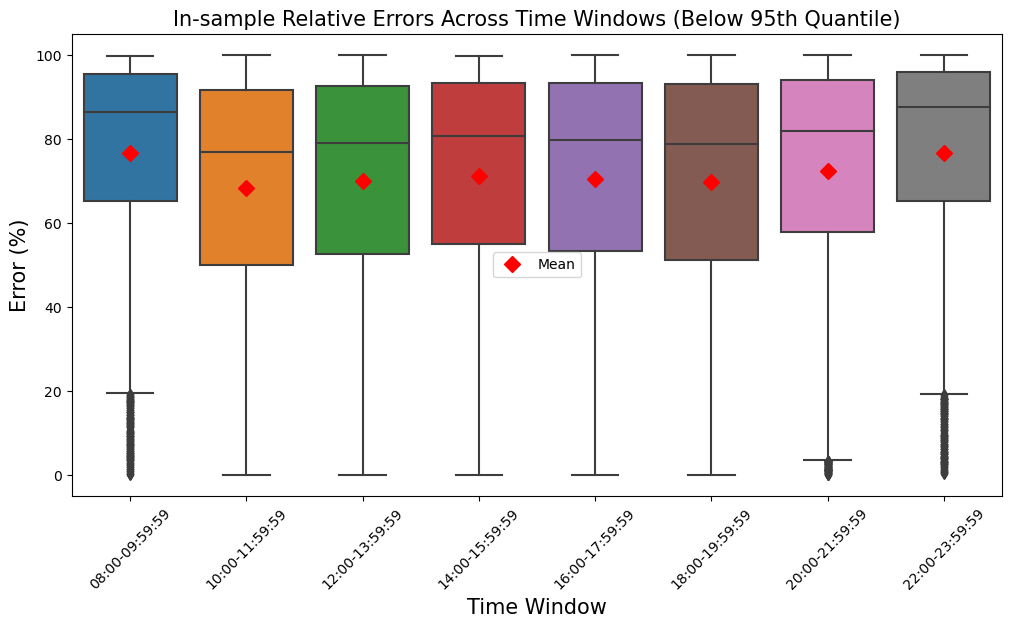

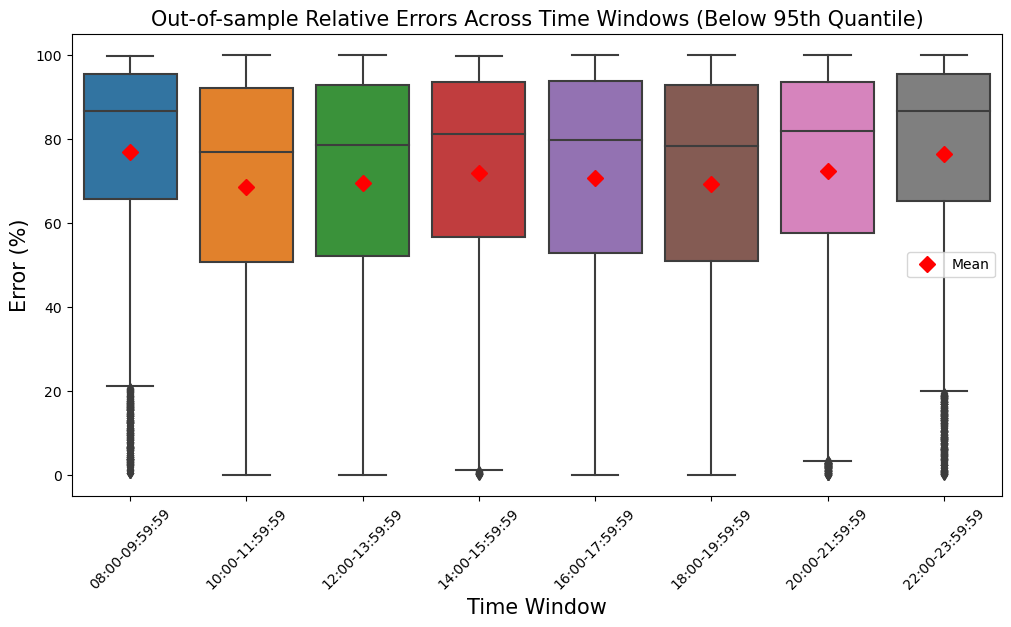

       08:00-09:59:59  10:00-11:59:59  12:00-13:59:59  14:00-15:59:59  \
0           98.533441       97.921655       23.669252       43.027055   
1           67.342786      100.000000       80.664917       75.582855   
2           97.277043       65.737696       84.640958       95.676599   
3           90.109088       76.581454       88.190529       85.847997   
4           93.927043      100.000000      100.000000      100.000000   
...               ...             ...             ...             ...   
10864             NaN             NaN             NaN             NaN   
10865             NaN             NaN             NaN             NaN   
10866             NaN             NaN             NaN             NaN   
10867             NaN             NaN             NaN             NaN   
10868             NaN             NaN             NaN             NaN   

       16:00-17:59:59  18:00-19:59:59  20:00-21:59:59  22:00-23:59:59  
0           98.050365        8.148636       35.9919

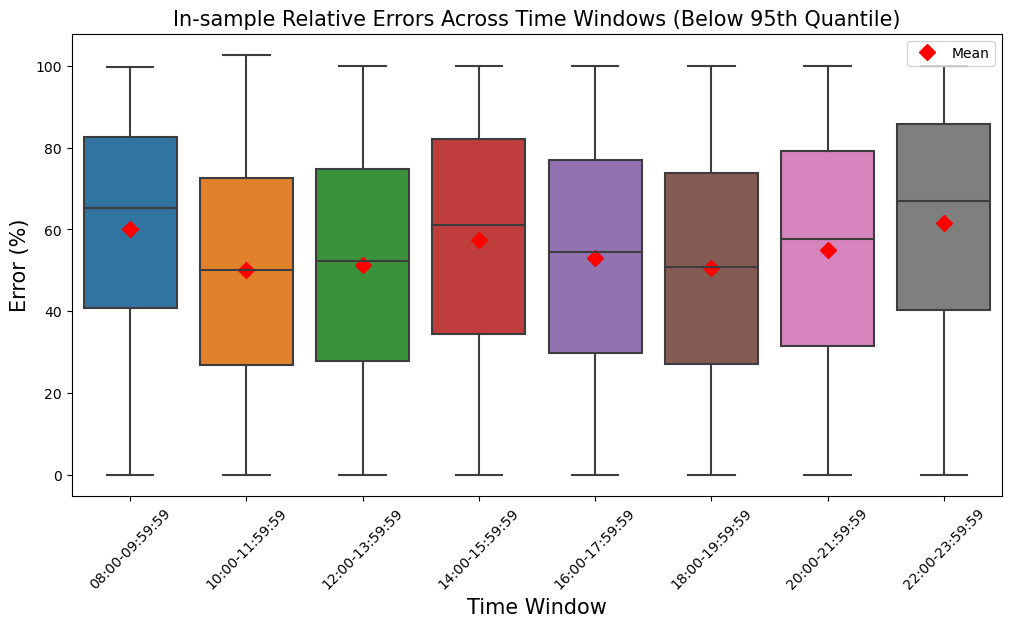

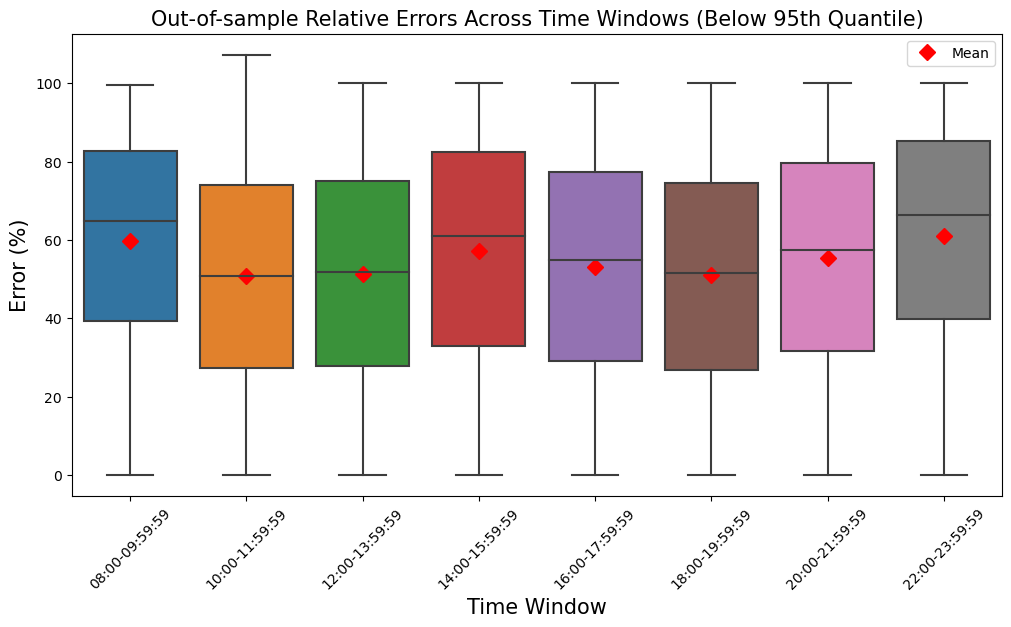

In [19]:
save_dir = 'results_5km/'
dist_per_grid_list = [
    0.5, 0.75
    # , 
    # 1.0, 1.5, 2.0, 2.5, 
    # 3.0
    # , 4.0,5.0
    ]  # List of distance per grid values

# Task 1: Fix grid size and time period, look at the WMAPE

# Define different time_windows configurations with identifiers
time_windows_configs = [
    ('full_day', [
        # ('00:00', '01:59:59'), 
        # ('02:00', '03:59:59'), 
        # ('04:00', '05:59:59'),
        ('08:00', '09:59:59'), 
        ('10:00', '11:59:59'), 
        ('12:00', '13:59:59'),
        ('14:00', '15:59:59'), 
        ('16:00', '17:59:59'), 
        ('18:00', '19:59:59'),
        ('20:00', '21:59:59'), 
        ('22:00', '23:59:59')
    ])]

experiments = [
    (dpg, tw, tw_id)
    for tw_id, tw in time_windows_configs
    for dpg in dist_per_grid_list
]
for d in dist_per_grid_list:
    exp1 = np.load(f'/home/go3/wch_code/jx/real_data/experiment1_5km/results_5km/results_dpg_{d}_full_day.npz', allow_pickle=True)
    # results = np.load(f'{save_dir}results_dpg_{dist_per_grid}_{tw_id}.npz', allow_pickle=True)
    # results = dict(results)['results']
    save_dir = f'plots_5km/dpg_{d}_tw_full_day'
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    visualize_results(exp1['results'], save_dir)
    # visualize_results(results['results'], save_dir)

